In [27]:
"""
This is an example of how 'numba' can be used to accelerate simple python code.
We calculate the recurrence relation:
x(n+1) = r*x(n)*(1-x(n))
(also known as the logistic map)
"""

from numba import jit
import matplotlib.pyplot as plt
import numpy as np

# To make effective use of numba, we should avoid using higher level python code.
# The following method uses only basic math and array indexing.

def logistic_map(ar_histogram, r_range, x, n):
    """Renders a logistic map into a 2D array"""
    r = r_range[0]
    r_span = r_range[1] - r_range[0]
    r_step = float(r_span)/n
    x_scale = ar_histogram.shape[0]
    r_scale = float(ar_histogram.shape[1]) / r_span
    for i in range(n):
        k = int((r - r_range[0]) * r_scale)
        x = r * x * (1. - x)
        j = int(x * x_scale)
        if j >= x_scale:
            j = x_scale - 1
        if j < 0:
            j = 0
        ar_histogram[j,k] += 1
        r += r_step
    return ar_histogram

# create a jit version of the method
logistic_map_jit = jit(logistic_map)

# alternatively, it is possible to use a decorator:
# 
# @jit
# def f(x)
#     return x+1



In [37]:
"""There is a factor of more than 100 in performance (note the value of n):"""
%timeit logistic_map(np.zeros((1500,2000)), [3.5,4.], 0.5, int(1e5))
# note that the first call takes slightly longer because the function is compiled.
%timeit logistic_map_jit(np.zeros((1500,2000)), [3.5,4.], 0.5, int(1e7))

10 loops, best of 3: 132 ms per loop
10 loops, best of 3: 59.6 ms per loop


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


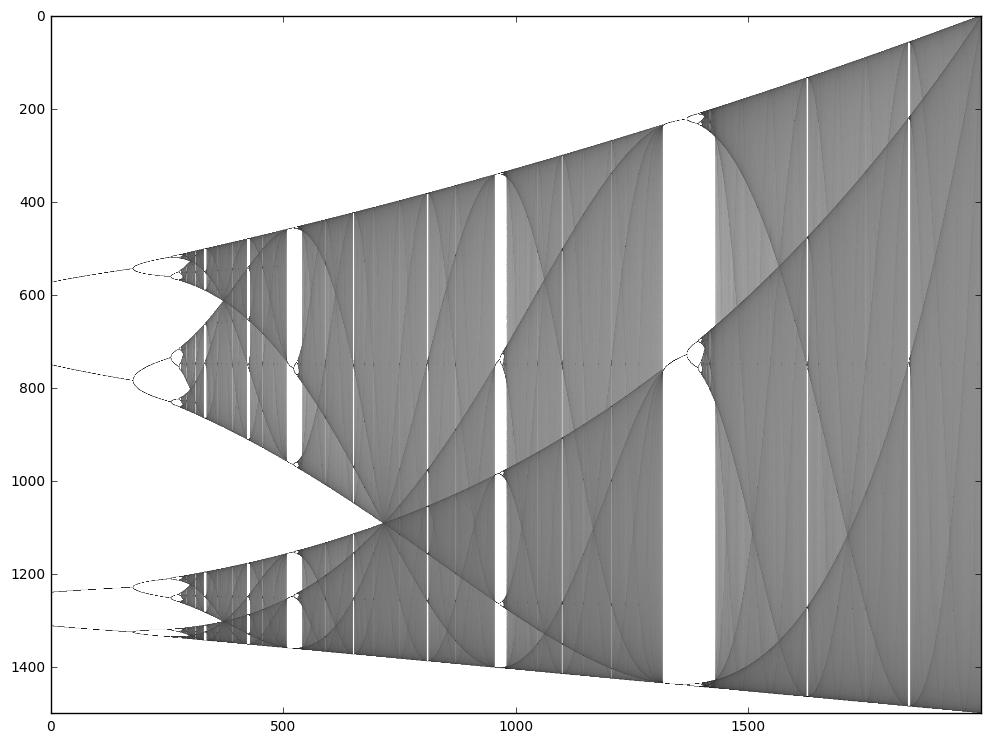

In [29]:
"""Plot the 2D array (with logarithmic scale for colors)"""
plt.figure(figsize=(12,9))
plt.imshow(np.log(logistic_map_jit(np.zeros((1500,2000)), r_range=[3.5,4.], x=0.5, n=int(1e9))), cmap='gray_r')
plt.show()